<a href="https://colab.research.google.com/github/bbhavii/Project-Work/blob/main/Agglomerative%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from google.colab import files 
import math 
from operator import indexOf

In [ ]:
#using the upload function to upload the data
uploaded = files.upload()

Saving dataset - Sheet1.csv to dataset - Sheet1 (3).csv


In [ ]:
#reading the uploaded data as ourData
ourData = pd.read_csv('dataset - Sheet1.csv') #upload our csv file here 

#extracting 2 features from our dataset. check if data needs to be scaled.
Data = ourData.iloc[300:800, [0,1]].values 
#initial number of clusters
InitClusters = len(Data) 
print('Initial Number of points/clusters: ',InitClusters)

Initial Number of points/clusters:  500


In [ ]:
class Compute_Distance(object):

  def __init__(self):

    pass

  def distance(self, dataSet):

    distance_matrix = np.zeros((len(dataSet), len(dataSet)))

    for i in range(distance_matrix.shape[0]):
      for k in range(distance_matrix.shape[0]):
        if i!=k:
          distance_matrix[i,k] = float(self.Eucl_distance(dataSet[i], dataSet[k]))
        else:
          distance_matrix[i,k] = 100

    return distance_matrix

  def Eucl_distance(self, data1, data2):

    dis = []

    for i in range(len(data1)):
      for k in range(len(data2)):
        try:
          euc_dist = math.sqrt(pow((data1[i][0]-data2[k][0]),2) + pow(data1[i][1]-data2[k][1]),2)
          dis.append(euc_dist)

          #dis.append(np.linalg.norm(np.subtract(data1[i],data2[k])))
        except:
          dis.append(self.cluster_sample_distance(data1[i], data2[k]))

    return min(dis)

  def cluster_sample_distance(self, d1, d2):

        if type(d2[0])!=list:
            d2=[d2]
        if type(d1[0])!=list:
            d1=[d1]

        m = len(d1)
        n = len(d2)

        dis =[]

        if n>m:
          for i in range(n):
            for k in range(m):
              if len(d2[i])>=len(d1[k]) and type(d2[i][0]) != list:
                dis.append(self.clusterdis(d2[i],d1[k]))
              else:
                euc_dist = math.sqrt(pow((d2[i][0]-d1[k][0]),2) + pow(d2[i][1]-d2[k][1]),2)
                dis.append(euc_dist)
                #dis.append(np.linalg.norm(np.subtract(d2[i],d1[k])))
        else:
          for i in range(m):
            for k in range(n):
              if len(d1[i]) >= len(d2[k]) and type(d1[i][0]) != list:
                dis.append(self.clusterdis(d1[i],d2[k]))
              else:
                euc_dist = math.sqrt(pow((d1[i][0]-d2[k][0]),2) + pow(d1[i][1]-d2[k][1]),2)
                dis.append(euc_dist)

        return min(dis)

    
  def clusterdis(self,cluster,sample):
        if sample[0]!='\'list\'>':
            sample = [sample]
        dis=[]
        for i in range(len(cluster)):
            for j in range(len(sample)):
                euc_dist = math.sqrt(pow((cluster[i][0]-sample[j][0]),2) + pow(cluster[i][1]-sample[j][1]),2)
                dis.append(euc_dist)
                #dis.append(np.linalg.norm(np.subtract((cluster[i]),(sample[j]))))
        return min(dis)
    



In [ ]:
index = [[i] for i in range(Data.shape[0])]
dataSet = [[list(Data[i])] for i in range(Data.shape[0])]
length = len(dataSet)
Distance = Compute_Distance()

In [ ]:
while length > 1:
    print('Sample size before clustering    :- ',length)
    Distance_mat  = Distance.distance(dataSet)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add  = dataSet.pop(sample_ind_needed[1])
    dataSet[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',index[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',index[sample_ind_needed[1]])
    
    index[sample_ind_needed[0]].append(index[sample_ind_needed[1]])
    index[sample_ind_needed[0]] = [index[sample_ind_needed[0]]]
    v = index.pop(sample_ind_needed[1])
    m = len(index)
    
    print('Progression(Current Sample)      :-',index)
    print('Cluster attained                 :-',index[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')

Sample size before clustering    :-  500


IndexError: ignored

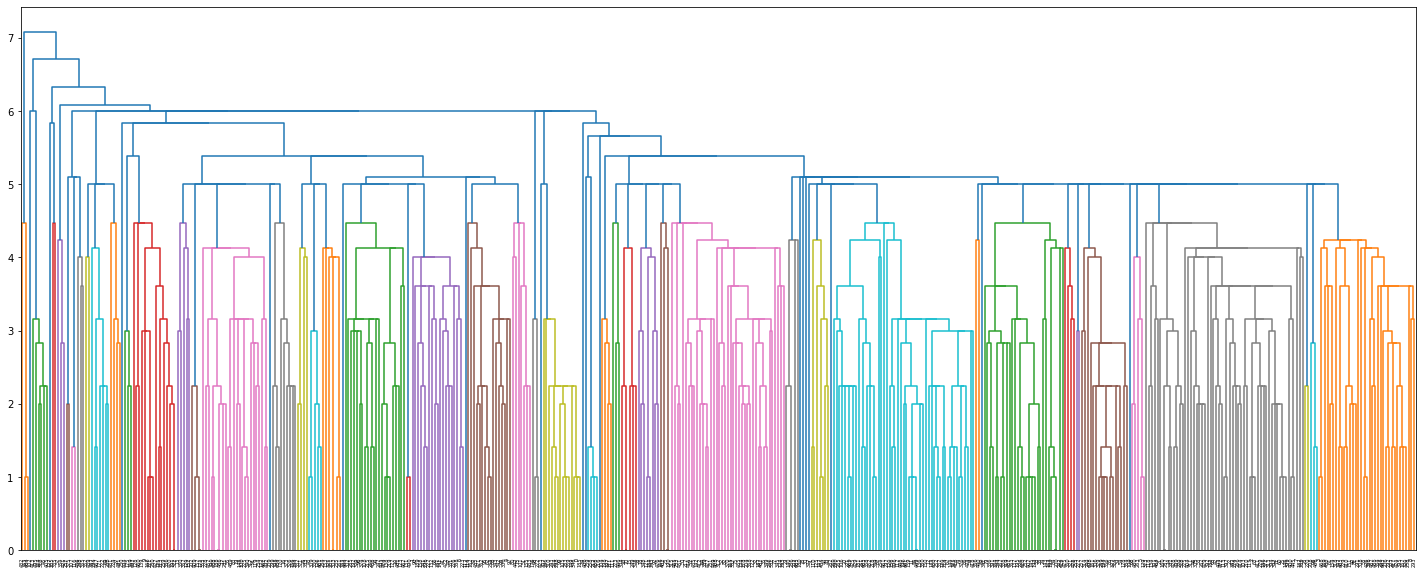

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(Data, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)